In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import ipywidgets as widgets
from IPython.display import display

%matplotlib inline
from qiskit import QuantumCircuit, QuantumRegister, Aer
from qiskit.quantum_info.operators import Operator
from qiskit.visualization import plot_histogram
from numpy import sin, cos, pi, linspace
import qiskit as qkt
import matplotlib.pyplot as plt
from random import seed,uniform

seed(42)

Run this first ⮥

# IBM QCHack creative challenge 
## Team name: Quackers
## Project: Make your own Hadamard gate
### Team members:
-  Esteban Payares
-  Vismai Khanderao
-  Denis Jankovic 

## Introduction

<div style="text-align: justify;">Quantum computing relies on three purely quantum phenomena :

        - Superposition
        - Interference
        - Entanglement
    
Let's focus for this challenge on interference and see how important it is in quantum algorithms
    </div>

### Hadamard gate and interference

The Hadamard gate can showcase a good example for quantum interference. A qubit can be in a superposition of it's two basis states : $$\alpha \left|0\right> + \beta \left|1\right> \qquad \textrm{or} \qquad \begin{pmatrix} \alpha \\ \beta \end{pmatrix}$$

The Hadamard gate $H$ takes the following matrix form :
$$ H = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 && 1 \\ 1 && -1 \end{pmatrix} $$

If one applies a Hadamard gate on a qubit on the simple $\left|0\right> = \begin{pmatrix} 1 \\0 \end{pmatrix}$ state, one obtains a nice superposition of both basis states :
$$H\left|0\right> = \frac{1}{\sqrt{2}} \left|0\right> + \frac{1}{\sqrt{2}} \left|1\right> \qquad \textrm{or} \qquad \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ 1 \end{pmatrix}$$

And on the  $\left|1\right> = \begin{pmatrix} 1 \\0 \end{pmatrix}$ state, the Hadamard gate gives a slightly different superposition :
$$H\left|1\right> = \frac{1}{\sqrt{2}} \left|0\right> - \frac{1}{\sqrt{2}} \left|1\right> \qquad \textrm{or} \qquad \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ -1 \end{pmatrix}$$

Now, if one reapplies a Hadamard gate on either of those states, <b>quantum interference appears :</b>

$$H\left(\frac{1}{\sqrt{2}} \left|0\right> + \frac{1}{\sqrt{2}} \left|1\right>\right) = \frac{1}{\sqrt{2}} H\left|0\right> + \frac{1}{\sqrt{2}} H\left|1\right> = \frac{1}{\sqrt{2}}\left(\frac{1}{\sqrt{2}} \left|0\right> + \frac{1}{\sqrt{2}} \left|1\right>\right) + \frac{1}{\sqrt{2}} \left(\frac{1}{\sqrt{2}} \left|0\right> - \frac{1}{\sqrt{2}} \left|1\right>\right) $$

This simplifies to : $$ \frac{1}{2} \left|0\right> + \frac{1}{2} \left|1\right> + \frac{1}{2} \left|0\right> - \frac{1}{2} \left|1\right> = \left|0\right> $$

Did you see the interference ? Exactly ! The two $\frac{1}{2} \left|0\right>$ have interfered constructively to give $\left|0\right>$ and the two $\frac{1}{2} \left|1\right>$ have interfered destructively and thus they disappeared.

NB: If you applied two consecutive $H$ gates on $\left|1\right>$ you would have ended up on $\left|1\right>$ again, this time the two $\frac{1}{2} \left|0\right>$ would have interfered destructively and the two $\frac{1}{2} \left|1\right>$ have interfered constructively. Try it out!

### When interference fails

Now to showcase how important interference is, suppose you start with the superposed qubit : 
$$\frac{1}{\sqrt{2}} \left|0\right> + \frac{1}{\sqrt{2}} \left|1\right> $$

You want to end up with $\left|0\right>$, so you want to make the $\left|0\right>$'s interfere constructively while the $\left|1\right>$'s interfere destructively. We saw you need a Hadamard gate for this. But let's keep in mind that you need to implement such a gate physically if you want to run the whole thing in the real world.

In the physical world, things are rarely perfectly perfect, so the Hadamard gate might not be exactly :
$$ H = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 && 1 \\ 1 && -1 \end{pmatrix} \approx \begin{pmatrix} 0.71 && 0.71 \\ 0.71 && -0.71 \end{pmatrix} $$

It can for example be slighty off, in other words, the contrusctive and destrcutive interferences are not exactly totally constructive and destructive. If your Hadamard gate looked something like this :

$$ H' = \begin{pmatrix} 0.65 && 0.76 \\ 0.76 && -0.65\end{pmatrix} $$

When you apply $H'$ on your superposed state you would obtain such a series of measurments :

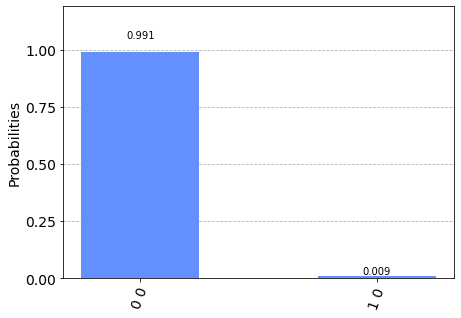

In [2]:
circuit = QuantumCircuit(1,1)
H_prime = Operator([[0.648640115686581, 0.7610952636313663], [0.7610952636313663, -0.648640115686581]])

circuit.h(0)
circuit.unitary(H_prime, 0, label='H_prime')

circuit.measure_all()

sim = qkt.Aer.get_backend('qasm_simulator')
qobj = qkt.assemble(circuit) 
result = sim.run(qobj).result() 

counts = result.get_counts()
plot_histogram(counts)

When you should have in fact gotten $\left|0\right>$ 100% of the time, here you got it only ~99% of the time, and the other times you even obtain the straight opposite : $\left|1\right>$.

### Grover's Search Algorithm

Without going into detail about how the algorithm works ([See here](https://qiskit.org/textbook/ch-algorithms/grover.html#3qubits)). If you have two qubits, you can encode 4 elements of a database by indexing them with $\left|00\right>, \left|01\right>, \left|10\right>, \left|11\right>$. 

You can then apply a succession on gates in order to find one of those elements. In our case, it will be the one marked with $\left|11\right>$. Most of those gates will be Hadamard gates that will make states interfere with one another so that all the states interfere destructively except the one we want to measure at the end. You see that quantum interference will be very important if you want the algorithm to work.

This is great, because sometimes, the speed it takes to apply all those gates is much faster than the time it would take a classical computer to find the marked element. Especially when the number of elements in the database is great !

This is what the circuit for Grover's Algorithm looks like :

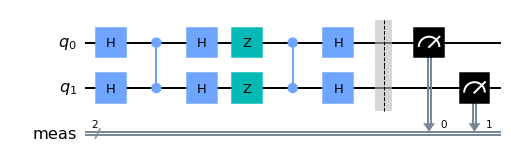

In [3]:
n = 2
grover_circuit = QuantumCircuit(n)

for q in range(n):
    grover_circuit.h(q)
    
grover_circuit.cz(0,1) # Oracle
grover_circuit.h(0)
grover_circuit.h(1)
grover_circuit.z([0,1])
grover_circuit.cz(0,1)
grover_circuit.h(0)
grover_circuit.h(1)

grover_circuit.measure_all()

grover_circuit.draw('mpl', idle_wires=False)

The result when you run the circuit, should then give you $ \left|11\right> $ 100% of the time, on an ideal quantum computer that is.

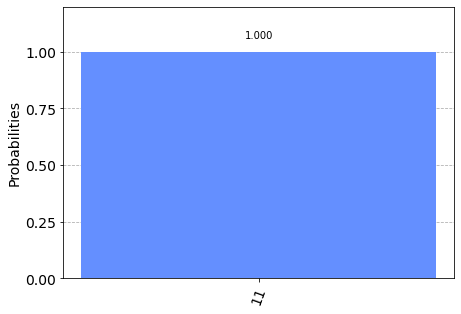

In [4]:
sim = qkt.Aer.get_backend('qasm_simulator')
qobj = qkt.assemble(grover_circuit) 
result = sim.run(qobj).result() 

counts = result.get_counts()
plot_histogram(counts)

## Your turn now !

Now it's your turn, you will have to make two waves interfere destructively in order to create a perfect Hadamard gate ! Be careful we will then use your Hadamard gate to implement Grover's algorithm. In other words, the circuit we will create is :

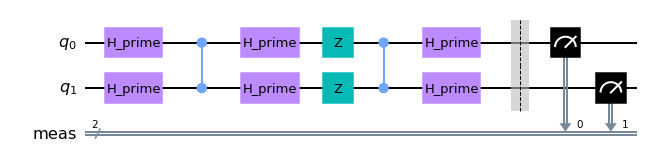

In [5]:
n = 2
grover_circuit = QuantumCircuit(n)
for q in range(n):
    grover_circuit.unitary(H_prime, q, label='H_prime')
grover_circuit.cz(0,1) # Oracle
grover_circuit.unitary(H_prime, 0, label='H_prime')
grover_circuit.unitary(H_prime, 1, label='H_prime')
grover_circuit.z([0,1])
grover_circuit.cz(0,1)
grover_circuit.unitary(H_prime, 0, label='H_prime')
grover_circuit.unitary(H_prime, 1, label='H_prime')

grover_circuit.measure_all()

grover_circuit.draw('mpl', idle_wires=False)

Where H_prime is <b>your</b> Hadamard gate, so we count on you ! Your goal is that at the end of the algorithm you obtain $ \left|11\right> $ 100% of the time. Be careful the less destructively the waves interfere, the less the ouput of the code will be correct. If the waves interfere constructively, then the circuit will even bring you back where you started with both qubits initialized to $\left|0\right>$.

In [6]:
import ipywidgets as widgets
from IPython.display import display

%matplotlib inline
from qiskit import QuantumCircuit, QuantumRegister, Aer
from qiskit.quantum_info.operators import Operator
from qiskit.visualization import plot_histogram
from numpy import sin, cos, pi, linspace
import qiskit as qkt
import matplotlib.pyplot as plt

def f(phase_1, phase_2):
    figure, ax = plt.subplots(3, constrained_layout=True)
    x = linspace(-2*pi, 2*pi, 1000)
    f = 1
    y_1 = cos(f * x + phase_1)
    y_2 = cos(f * x + phase_2)
    
    ax[0].plot(x, y_1)
    ax[0].plot(x, y_2)
    
    ax[1].set_ylim([-2.2, 2.2])
    ax[1].plot(x, y_1+y_2, 'purple')
    
    dphi = abs(phase_1-phase_2)%(2*pi)
    theta = dphi/4
    H_prime = Operator([[cos(theta),sin(theta)], 
                   [sin(theta),-cos(theta)]])
    
    n = 2
    grover_circuit = QuantumCircuit(n)
    for q in range(n):
        grover_circuit.unitary(H_prime, q, label='H_prime')
    grover_circuit.cz(0,1) # Oracle
    grover_circuit.unitary(H_prime, 0, label='H_prime')
    grover_circuit.unitary(H_prime, 1, label='H_prime')
    grover_circuit.z([0,1])
    grover_circuit.cz(0,1)
    grover_circuit.unitary(H_prime, 0, label='H_prime')
    grover_circuit.unitary(H_prime, 1, label='H_prime')
    
    grover_circuit.measure_all()

    sim = qkt.Aer.get_backend('qasm_simulator')
    qobj = qkt.assemble(grover_circuit) 
    result = sim.run(qobj).result() 

    counts = result.get_counts()
    ax[2].bar(counts.keys(),counts.values())

phase_1 = widgets.FloatSlider(min=uniform(0, pi/2), max=uniform(2*pi, 5*pi/2), step=0.01, value=uniform(pi-pi/6, pi+pi/6), description='Phase 1:', layout=widgets.Layout(width='75%'))
phase_2 = widgets.FloatSlider(min=uniform(0, pi/2), max=uniform(2*pi, 5*pi/2), step=0.01, value=uniform(pi-pi/6, pi+pi/6), description='Phase 2:', layout=widgets.Layout(width='75%'))
widgets.interactive(f, phase_1=phase_1, phase_2=phase_2)

interactive(children=(FloatSlider(value=2.9060039066949055, description='Phase 1:', layout=Layout(width='75%')…